In [241]:
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
root = Path('/Users/shhong/Dropbox/network_data/output_brep_2')

In [3]:
root

PosixPath('/Users/shhong/Dropbox/network_data/output_brep_2')

In [8]:
xyz = np.loadtxt(root / "GoCcoordinates.sorted.dat")
dist0 = np.loadtxt(root / "GoCtoGoCdistances.dat")

In [38]:
src = np.loadtxt(root / "GoCtoGoCsources.dat").astype(int)
tgt = np.loadtxt(root / "GoCtoGoCtargets.dat").astype(int)

In [11]:
axon0 = np.loadtxt(root / "GoCaxoncoordinates.sorted.dat")

In [26]:
axon0.shape
npoints = int(axon0.shape[1]/3)

In [270]:
# axon = [np.vstack([x[:3], x.reshape(npoints, 3)[1::2]]) for x in axon0]
axon = [x.reshape(npoints, 3)[1::2] for x in axon0]
axon[0]

array([[ 219. ,  -10.5,   23. ],
       [ 187. ,  104.5,   -4. ],
       [ 244. ,  102.5,  -50. ],
       [ 194. ,   69.5,   71. ],
       [ 246. ,   -1.5,   32. ],
       [ 220. ,  -69.5,  -24. ],
       [ 205. ,  -76.5,  -22. ],
       [ 211. ,    6.5,  -51. ],
       [ 261. ,  117.5,   67. ],
       [ 242. ,  143.5,   96. ],
       [ 181. ,   10.5,   62. ],
       [ 202. ,   62.5,  -23. ],
       [ 251. ,  -20.5,   43. ],
       [ 199. ,   57.5,    5. ],
       [ 193. , -107.5,   14. ],
       [ 258. ,   94.5,   -4. ],
       [ 174. ,   61.5,   45. ],
       [ 210. , -161.5,   34. ],
       [ 194. ,  116.5,   68. ],
       [ 240. ,  125.5,   33. ]])

In [271]:
from tqdm import tqdm_notebook
colx = {}
for i in tqdm_notebook(range(ncell)):
    for j in range(ncell):
        if i!=j:
#         i = 1759
#         j = 1936
            di, ii = cKDTree(axon[i]).query(xyz[j])
            axon_len = np.sqrt(np.sum((axon[i][ii]-xyz[i])**2))
#             print(di, axon_len, axon_len+di)
            if di<100:
                colx[(i, j)] = axon_len + di
            

In [150]:
il, = np.where(np.logical_and(src==i, tgt==j))
il

array([42039])

In [151]:
dist0[il]

array([282.05695718])

In [88]:
axon[[1,2]]

TypeError: list indices must be integers or slices, not list

In [96]:
ncell = 1995
ncoords = int(axon.shape[0]/ncell)

In [111]:
cellind!=0

array([False, False, False, ...,  True,  True,  True])

In [108]:
cellind.shape

(79800,)

In [109]:
axon.shape

(79800, 3)

In [113]:
xyz[0]

array([219.,   0.,  23.])

In [119]:
cellind[cellind!=i][1173]

30

In [159]:
len(colx.keys())

256440

In [160]:
src.size

184684

In [256]:
i = 0
s, t = src[i], tgt[i]
print(s, t)
print(colx[(s, t)])
print(dist0[i])

1921 1920
53.86294886692424
98.2372633010221


In [225]:
colx[(t, s)]

143.14873147064438

In [261]:
s, t
di, ii = cKDTree(axon[s]).query(xyz[t])
axon_len = np.sqrt(np.sum((axon[s][ii]-xyz[s])**2))
print(s, t, di, axon_len)

1921 1920 34.07345007480164 0.0


In [235]:
dd[np.logical_and(dd[:,0]==s, dd[:,1]==t),2]

array([122.95527642])

In [275]:
dd = np.array([colx[(src[i], tgt[i])]-dist0[i] for i, _ in enumerate(src) if (src[i], tgt[i]) in colx.keys()])

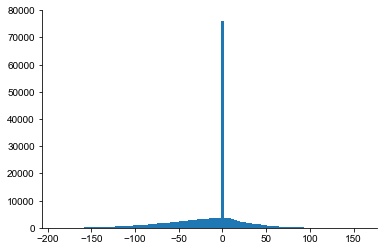

In [276]:
_ = plt.hist(dd,100)

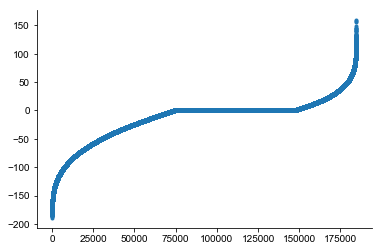

In [277]:
plt.plot(np.sort(dd),'.')

# ??

In [182]:
xyz[t]

array([1350.,  511.,  108.])

In [189]:
dd = np.loadtxt(root / "GoCdistances0.dat")

In [238]:
plt.plot(dd)

NameError: name 'plot' is not defined

In [273]:
len(colx.keys())

256263

In [278]:
xyz = np.loadtxt(root / "GoCcoordinates.sorted.dat")

In [279]:
from neuron import h

In [280]:
h.load_file('/Users/shhong/Documents/cerebellar_cortex/Molecular_Layer/params/set3005/Parameters.hoc')

Nseg for APical is 5 and Basal is 3
	36 


1.0

In [285]:
width = []
minp = []
for k in ['X', 'Y', 'Z']:
    amin = eval("h.GoC_Axon_{}min".format(k))
    amax = eval("h.GoC_Axon_{}max".format(k))
    width.append(amax-amin)
    minp.append(amin)
width, minp = np.array(width), np.array(minp)

-45.0 45.0
-162.5 162.5
-75.0 75.0
[90.0, 325.0, 150.0] [-45.0, -162.5, -75.0]


In [327]:
axon_coord = np.random.rand(ncell*20,3)
axon_coord = axon_coord*width + minp

In [328]:
naxon = int(h.numAxonGolgi)
axon_base = np.zeros_like(axon_coord)
for i in range(ncell):
    axon_coord[(naxon*i):(naxon*(i+1))] = axon_coord[(naxon*i):(naxon*(i+1))] + xyz[i]
    axon_base[(naxon*i):(naxon*(i+1))] = xyz[i]
axon_coord

array([[ 217.26670265,  -63.87375058,   69.23258076],
       [ 219.22142032,  143.46846988,   47.80986379],
       [ 177.21250012,   14.83625529,   13.75934021],
       ...,
       [1152.18412529,  792.02046545,   65.70798586],
       [1189.56691711,  665.18707163,   67.69751356],
       [1180.18460866,  551.65109259,  164.01319551]])

In [329]:
axon_coord_file = np.hstack([axon_base, axon_coord])
axon_coord_file

array([[ 219.        ,    0.        ,   23.        ,  217.26670265,
         -63.87375058,   69.23258076],
       [ 219.        ,    0.        ,   23.        ,  219.22142032,
         143.46846988,   47.80986379],
       [ 219.        ,    0.        ,   23.        ,  177.21250012,
          14.83625529,   13.75934021],
       ...,
       [1180.        ,  697.        ,  135.        , 1152.18412529,
         792.02046545,   65.70798586],
       [1180.        ,  697.        ,  135.        , 1189.56691711,
         665.18707163,   67.69751356],
       [1180.        ,  697.        ,  135.        , 1180.18460866,
         551.65109259,  164.01319551]])

In [337]:
temp = np.reshape(axon_coord_file, (ncell,  2*naxon*3))
temp[0,:]
np.savetxt('temp.dat', temp)

In [338]:
axon_coord

array([[ 217.26670265,  -63.87375058,   69.23258076],
       [ 219.22142032,  143.46846988,   47.80986379],
       [ 177.21250012,   14.83625529,   13.75934021],
       ...,
       [1152.18412529,  792.02046545,   65.70798586],
       [1189.56691711,  665.18707163,   67.69751356],
       [1180.18460866,  551.65109259,  164.01319551]])

In [363]:
from tqdm import tqdm_notebook
dist = []
src = []
tgt = []

for i in tqdm_notebook(range(ncell)):
    axon_coord1 = axon_coord[(i*naxon):((i+1)*naxon),:]
    tree = cKDTree(axon_coord1)
    for j in range(ncell):
        if i!=j:
            di, ii=tree.query(xyz[j])
            axon_len = np.linalg.norm(axon_coord1[ii]-xyz[i])
            if di<h.GoCtoGoCzone:
                src.append(i)
                tgt.append(j)
                dist.append(axon_len + di)
            

In [364]:
dist

[134.5496854359743,
 122.20432202722608,
 119.42921662519356,
 59.71140876809803,
 109.45206412717893,
 138.65316219148497,
 74.80064947274529,
 120.82913611540607,
 154.351820441725,
 71.627396979957,
 124.31507181262901,
 141.99806218424516,
 194.08424970953342,
 150.96885245548148,
 169.29640402384078,
 235.15101714037795,
 226.47166211857254,
 146.18463295550598,
 177.32833341485318,
 222.4298553348243,
 154.83327879145557,
 193.56786552086515,
 221.66937637612403,
 182.94347729763263,
 173.18872691012723,
 188.3009544091518,
 220.96561572261163,
 238.86644877152315,
 219.02911711612364,
 198.46570401175387,
 193.9589256678446,
 233.23574918793156,
 186.5349721167948,
 219.46466139580247,
 187.60632831268026,
 216.82703975507746,
 204.39017780360416,
 223.97948321624938,
 233.0888012847048,
 220.1397598439185,
 248.7052213315957,
 232.9421219045393,
 219.1697127716096,
 247.28913405121457,
 172.16050187862072,
 121.84216545920592,
 139.77645952366595,
 162.93717884949893,
 152.9209

In [340]:
axon_coord[0:2*naxon]

array([[ 217.26670265,  -63.87375058,   69.23258076],
       [ 219.22142032,  143.46846988,   47.80986379],
       [ 177.21250012,   14.83625529,   13.75934021],
       [ 198.47055034,  -81.85781377,   14.8170178 ],
       [ 224.96437033, -125.23033055,  -22.6868058 ],
       [ 181.07878312,  147.53167093,    1.31534709],
       [ 182.28400889,   68.0178075 ,  -14.34174402],
       [ 243.43559728,   96.13232148,  -24.35441039],
       [ 218.43695995,  -12.78778   ,   30.4394671 ],
       [ 244.02046886,   44.27099096,  -15.58434834],
       [ 221.23354612,   49.30615098,   79.39137991],
       [ 226.64946814,   56.95108046,   42.55697022],
       [ 251.90299046,   19.02426673,   34.73425671],
       [ 180.02855497,  -84.1627712 ,  -10.97747699],
       [ 226.05220483,   32.75567738,   -4.76543679],
       [ 254.24370623,   12.01781215,   -2.55236693],
       [ 226.48460032, -140.1821285 ,   14.80806994],
       [ 254.25532843,  -45.61366045,  -24.98426869],
       [ 235.31911824,    2.

In [353]:
np.savetxt('temp.dat', tgt, fmt='%d')

In [369]:
np.savetxt('temp.dat', dist)

In [356]:
from tqdm import tqdm_notebook
dist = []
src = []
tgt = []
for i in tqdm_notebook(range(ncell)):
    for j in range(ncell):
        if i!=j:
            di = np.linalg.norm(xyz[j]-xyz[i])
            if di<h.GoCtoGoCgapzone:
                src.append(i)
                tgt.append(j)
                dist.append(di)

In [357]:
dist

[72.53964433328854,
 50.941142507800116,
 62.080592780675026,
 61.814237842102365,
 24.919871588754223,
 53.60970061472084,
 42.01190307520001,
 52.38320341483518,
 62.24949798994366,
 58.42088667591412,
 72.30490993010088,
 38.34057902536163,
 62.49799996799898,
 71.53320907103218,
 57.28001396647874,
 79.01898506055365,
 77.1686464828819,
 24.919871588754223,
 71.0,
 60.54750201288241,
 68.97100840208152,
 42.44997055358225,
 69.16646586316233,
 56.57738063926254,
 69.29646455628166,
 76.66159403508382,
 64.20280367709809,
 27.202941017470888,
 78.3517708797957,
 53.60970061472084,
 71.0,
 13.379088160259652,
 13.490737563232042,
 26.40075756488817,
 23.790754506740637,
 69.59885056522126,
 65.19202405202648,
 29.274562336608895,
 73.9932429347437,
 65.31462317123173,
 74.7127833774114,
 42.01190307520001,
 60.54750201288241,
 13.379088160259652,
 12.36931687685298,
 79.78721702127478,
 26.570660511172846,
 31.448370387032774,
 57.01754116059373,
 55.614746245937326,
 32.649655434629

In [370]:
z = h.File('temp.dat')
z.ropen()

1.0

In [371]:
v = h.Vector()
v.scanf(z)

5283

In [372]:
v.x[0]

134.5496854359743

In [373]:
z.close()

0.0

In [376]:
v.x[1]

122.20432202722608

In [377]:
!open .
